In [ ]:
# Importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_csv('titanic_train.csv') # Loading and reading the dataset

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data.shape # Understandingbthe total rows and columns

(891, 12)

# EDA

<Axes: xlabel='Survived', ylabel='count'>

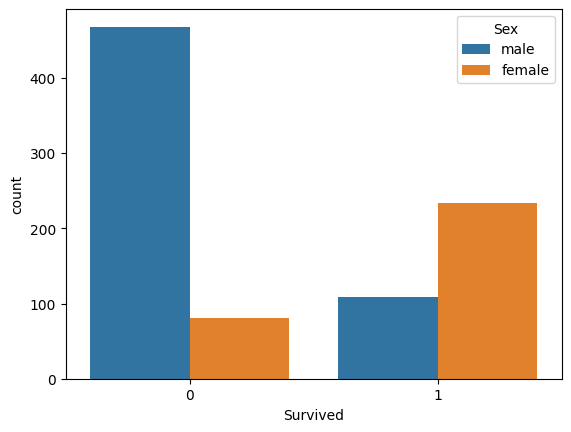

In [ ]:
sns.countplot(data = train_data, x = 'Survived', hue = 'Sex')

This shows that no. of males who survived are less in comparison to those who did not survive but the no. of females who survived are greater in comparison to those who did not survive.

<Axes: xlabel='Survived', ylabel='count'>

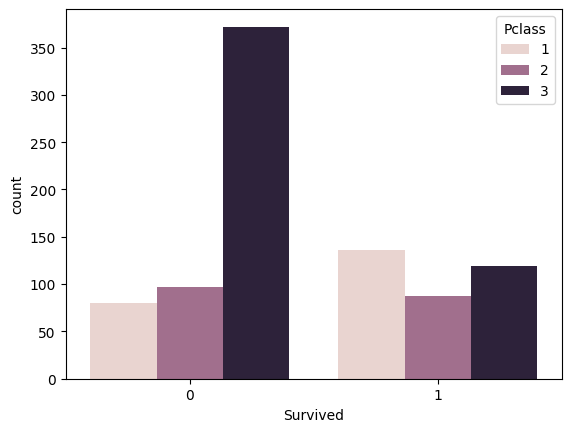

In [ ]:
sns.countplot(data = train_data, x = 'Survived', hue = 'Pclass')

This shows that there are total of three passenger classes i.e 1,2,3. Out of these the more are the passenger class 3 people who didn't survive. While the passengers of 1st class are the one who survived more than who didn't survive.

<Axes: xlabel='SibSp', ylabel='count'>

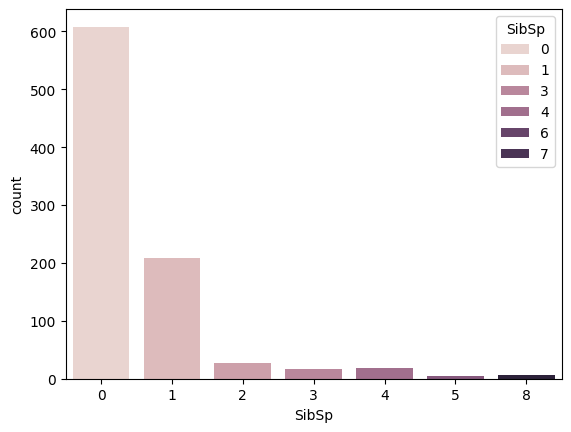

In [ ]:
sns.countplot(train_data, x = 'SibSp', hue = 'SibSp')

It can be inferred here that most of the passengers didn't have sibling or spouse.

<Axes: xlabel='Fare', ylabel='Count'>

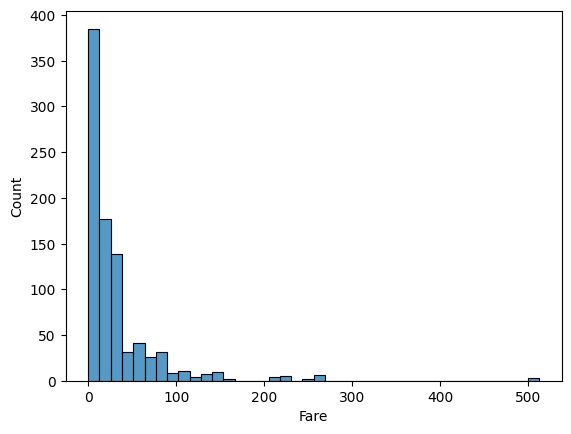

In [ ]:
sns.histplot(train_data, x = 'Fare', bins = 40)

It can be inferred that when the fare is low there are more takers of cheaper tickets.

In [ ]:
train_data.info() # Gives information about the dataset with null as well as non null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From above it's inferred that Age, Cabin and Embarked column have null values.

In [ ]:
train_data.isnull().sum() # To find total counts of null values in each column.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are null values in Age, Cabin and Embarked column. Since Age is numerical column we are going to impute it using median values.

In [ ]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median()) # filling the age column with median

In [ ]:
# We are dropping cabin column since most of the values are null
train_data.drop('Cabin', axis = 1, inplace = True)

<Axes: >

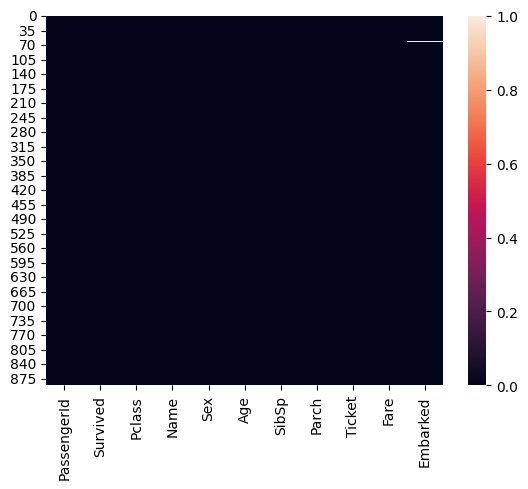

In [ ]:
sns.heatmap(train_data.isnull()) # Checking out null value in Age column and Whole of Cabin column is dropped

Here, we find that Embarked column is the only column left with null values. Since they are only 2 in number we can drop those.

In [ ]:
train_data.dropna(inplace = True)
train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
714,715,0,2,"Greenberg, Mr. Samuel",male,52.0,0,0,250647,13.0000,S
44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,Q
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,S
241,242,1,3,"Murphy, Miss. Katherine ""Kate""",female,28.0,1,0,367230,15.5000,Q
436,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.3750,S


Encoding categorical columns into numerical using get dummies.

In [ ]:
Sex = pd.get_dummies(train_data['Sex'], drop_first = True)
Embarked = pd.get_dummies(train_data['Embarked'], drop_first = True)
train_data = pd.concat([train_data ,Sex, Embarked], axis = 1)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


Dropping the columns that we're not going to use.

In [ ]:
train_data.drop(['Sex','Ticket','Embarked', 'Name','PassengerId'], axis = 1, inplace = True)

In [ ]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Train Test Split

In [ ]:
X = train_data.iloc[:,1:] # Separating the data in X, y sets.
y = train_data.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       141
           1       0.68      0.77      0.72        82

    accuracy                           0.78       223
   macro avg       0.77      0.78      0.77       223
weighted avg       0.79      0.78      0.79       223

